In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart/Heart (2).JPG
/kaggle/input/heart/heart.csv
/kaggle/input/heart-failure-prediction/heart.csv


<div style="color:white;background-color:#4e4151;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center"> <font color="#dbba78" size=+5 face="Viner Hand ITC"><div style="align:center: justify">Heart disease prediction</font></div>

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Viner Hand ITC; font-size:28px; color:#FBFAFC; ">Heart disease prediction code deployed on streamlit cloud</span>

[<font color="Blue" size=+3.5 face="Viner Hand ITC">Streamlit App Link</font>](https://afrozpython-heart-disease-heart-8ak93n.streamlit.app/)

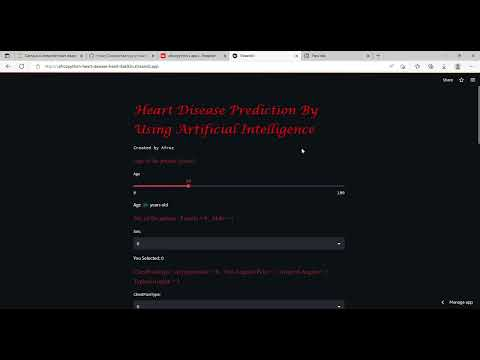

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('N51GXxgCMm8', width=950, height=400)

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import pickle
from PIL import Image

from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifierCV
from xgboost import XGBClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as Xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.svm import NuSVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import PassiveAggressiveClassifier


from sklearn.metrics import accuracy_score, classification_report,f1_score,confusion_matrix,precision_score,recall_score,balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve,roc_auc_score
from sklearn.metrics import recall_score, plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

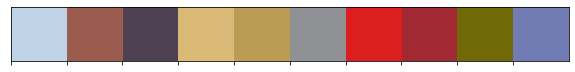

In [4]:
# Color Palettes
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]
sns.palplot(sns.color_palette(colors))

In [5]:
heart = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
heart.head().style.background_gradient(cmap='copper').set_precision(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [6]:
heart.describe().round(2).T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["min",], color='green')\
                     .bar(subset=["mean",], color='Orange')\
                     .bar(subset=['std'], color='#716807')\
                     .bar(subset=['50%'], color='#717cb4')

,count,mean,std,min,25%,50%,75%,max
Cholesterol,918.000000,198.800000,109.380000,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.810000,25.460000,60.000000,120.000000,138.000000,156.000000,202.000000
RestingBP,918.000000,132.400000,18.510000,0.000000,120.000000,130.000000,140.000000,200.000000
Age,918.000000,53.510000,9.430000,28.000000,47.000000,54.000000,60.000000,77.000000
Oldpeak,918.000000,0.890000,1.070000,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.550000,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000
FastingBS,918.000000,0.230000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
corr = heart.corr()
heart.corr().sort_values(by='HeartDisease', ascending=False).style.background_gradient(cmap='copper').set_precision(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
HeartDisease,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00
Oldpeak,0.26,0.16,0.05,0.05,-0.16,1.00,0.40
Age,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28
FastingBS,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27
RestingBP,0.25,1.00,0.10,0.07,-0.11,0.16,0.11
Cholesterol,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23
MaxHR,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40


In [8]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'
print(f"\033[94m\033[1m",color.BOLD + 'Missing values - Percentage: \n' + color.END)
print(f"\033[91m\033[1m",round(heart.isnull().mean() * 100, 2))

 Missing values - Percentage: 

 Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


In [9]:
print(f"\033[94m\033[1m",color.BOLD + 'Data information:- \n' + color.END)
heart.info()

 Data information:- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
cat = heart.select_dtypes(include='object').columns.tolist()

for col in heart[cat]:
    print(f"\033[94m\033[1m")
    print(col,"\n")
    print(f"\033[91m\033[1m")
    print(heart[col].value_counts())
    print(f"\033[92m\033[1m")
    print("======="*5)


Sex 


M    725
F    193
Name: Sex, dtype: int64


ChestPainType 


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


RestingECG 


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


ExerciseAngina 


N    547
Y    371
Name: ExerciseAngina, dtype: int64


ST_Slope 


Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64



In [11]:
heart['Sex']=heart['Sex'].astype('category')
heart['Sex']=heart['Sex'].cat.codes

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
heart = encoder.fit_transform(heart)
heart.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,0,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,0,3,138,214,0,1,108,2,1.5,2,1


In [12]:
from sklearn.model_selection import train_test_split
X = heart.drop('HeartDisease',axis=1)
y = heart['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2)

In [13]:
models = [
    LGBMClassifier(),
    RidgeClassifierCV(),
    XGBClassifier(),
    QuadraticDiscriminantAnalysis(),
    CalibratedClassifierCV(),
    BernoulliNB(),
    BaggingClassifier(),
    LogisticRegression(),
    NearestCentroid(),
    SVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    Perceptron(),
    SGDClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    NuSVC(),
    GaussianProcessClassifier(),
    RidgeClassifier(),
    CalibratedClassifierCV(),
    PassiveAggressiveClassifier()
      
]

In [14]:
def  estimate(true, predict):
    for model in models:
        
        Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
        F1_Score = f1_score(y_test,predict).round(2)
        Precision_Score = precision_score(y_test,predict).round(2)
        Recall_Score = recall_score(y_test,predict).round(2)
        Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
        Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
        Confusion_Matrix = confusion_matrix(y_test,predict)
        return Accuracy,F1_Score,Recall_Score,Precision_Score,Roc_Auc_Score,Balanced_Accuracy_Score,Confusion_Matrix

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">LogisticRegression </strong> 🎲  </h2>

 Accuracy  = 85.33 %
 F1 Score  = 0.86
 Roc Auc Score  = 0.85
 Balanced Accuracy Score  = 0.85
 Precision Score  = 0.85
 Recall Score  = 0.87 

 Confusion Matrix: 

[[74 15]
 [12 83]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.86      0.83      0.85        89
           1       0.85      0.87      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184




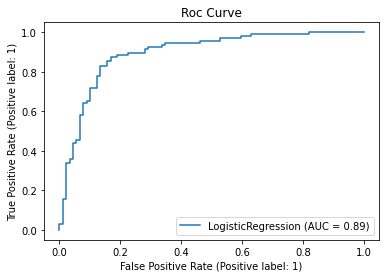

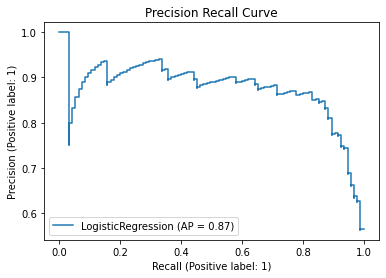

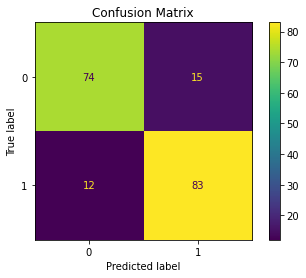

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');

print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m") 



        
results = pd.DataFrame(data=[["LogisticRegression", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">LGBMClassifier</strong> 🎲  </h2>

 Accuracy  = 86.41 %
 F1 Score  = 0.87
 Roc Auc Score  = 0.86
 Balanced Accuracy Score  = 0.86
 Precision Score  = 0.85
 Recall Score  = 0.89 

 Confusion Matrix: 

[[74 15]
 [10 85]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.88      0.83      0.86        89
           1       0.85      0.89      0.87        95

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184




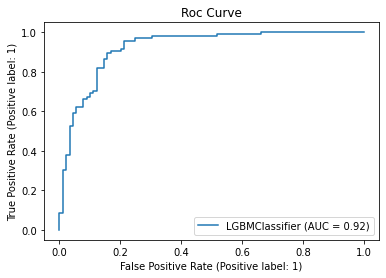

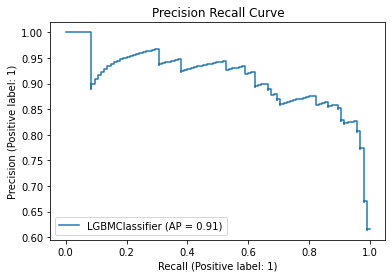

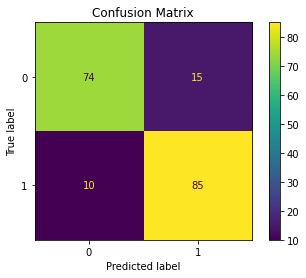

In [16]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');

print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["LGBMClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">RidgeClassifierCV</strong> 🎲  </h2>

 Accuracy  = 88.04 %
 F1 Score  = 0.89
 Roc Auc Score  = 0.88
 Balanced Accuracy Score  = 0.88
 Precision Score  = 0.88
 Recall Score  = 0.89 

 Confusion Matrix: 

[[77 12]
 [10 85]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.89      0.87      0.88        89
           1       0.88      0.89      0.89        95

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184




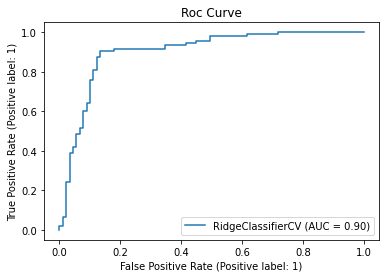

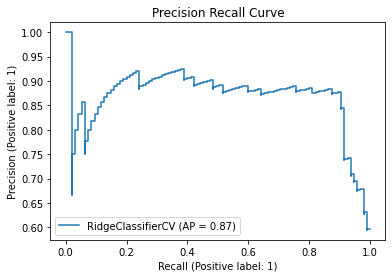

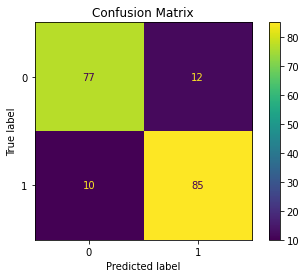

In [17]:
from sklearn.linear_model import RidgeClassifierCV

model = RidgeClassifierCV()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');

print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["RidgeClassifierCV", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">QuadraticDiscriminantAnalysis</strong> 🎲  </h2>

 Accuracy  = 84.24 %
 F1 Score  = 0.86
 Roc Auc Score  = 0.84
 Balanced Accuracy Score  = 0.84
 Precision Score  = 0.81
 Recall Score  = 0.91 

 Confusion Matrix: 

[[69 20]
 [ 9 86]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.88      0.78      0.83        89
           1       0.81      0.91      0.86        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184




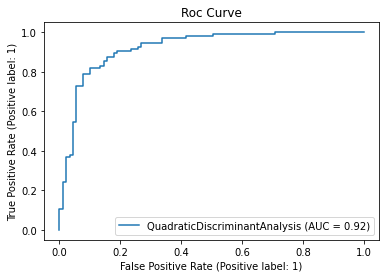

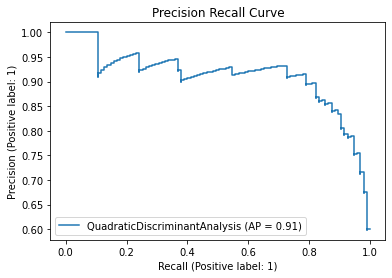

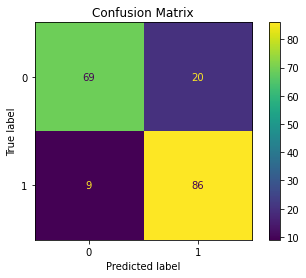

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');

print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["QuadraticDiscriminantAnalysis", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">BernoulliNB</strong> 🎲  </h2>

 Accuracy  = 80.98 %
 F1 Score  = 0.82
 Roc Auc Score  = 0.81
 Balanced Accuracy Score  = 0.81
 Precision Score  = 0.79
 Recall Score  = 0.86 

 Confusion Matrix: 

[[67 22]
 [13 82]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.75      0.79        89
           1       0.79      0.86      0.82        95

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184




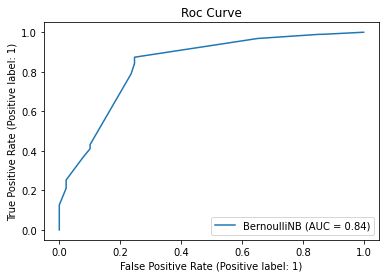

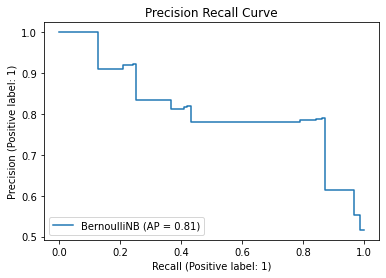

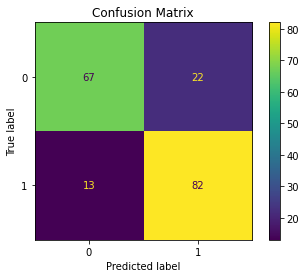

In [19]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
predict = model.predict(X_test)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)

print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["BernoulliNB", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">BaggingClassifier</strong> 🎲  </h2>

 Accuracy  = 81.52 %
 F1 Score  = 0.82
 Roc Auc Score  = 0.82
 Balanced Accuracy Score  = 0.82
 Precision Score  = 0.83
 Recall Score  = 0.81 

 Confusion Matrix: 

[[73 16]
 [18 77]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.80      0.82      0.81        89
           1       0.83      0.81      0.82        95

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184




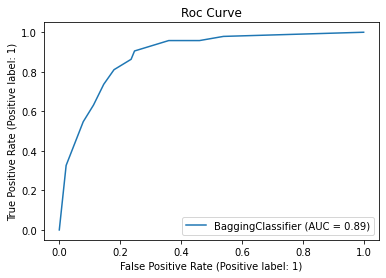

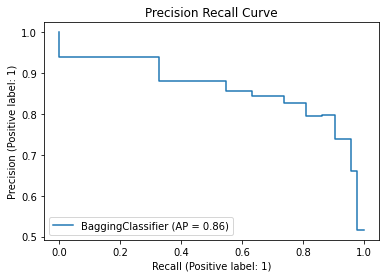

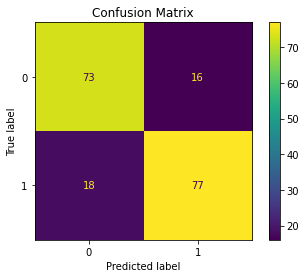

In [20]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["BaggingClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">CalibratedClassifierCV</strong> 🎲  </h2>

 Accuracy  = 83.7 %
 F1 Score  = 0.85
 Roc Auc Score  = 0.84
 Balanced Accuracy Score  = 0.84
 Precision Score  = 0.83
 Recall Score  = 0.86 

 Confusion Matrix: 

[[72 17]
 [13 82]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        89
           1       0.83      0.86      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184




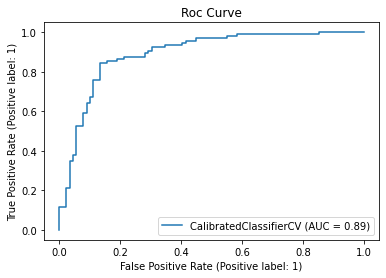

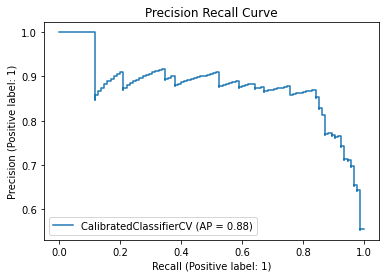

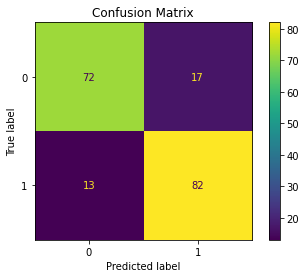

In [21]:
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["CalibratedClassifierCV", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">XGBClassifier</strong> 🎲  </h2>

 Accuracy  = 84.78 %
 F1 Score  = 0.86
 Roc Auc Score  = 0.85
 Balanced Accuracy Score  = 0.85
 Precision Score  = 0.84
 Recall Score  = 0.87 

 Confusion Matrix: 

[[73 16]
 [12 83]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.86      0.82      0.84        89
           1       0.84      0.87      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184




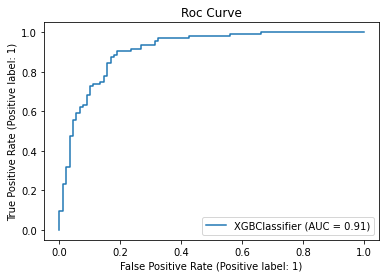

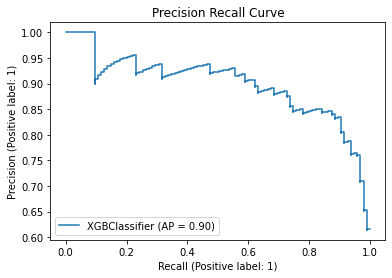

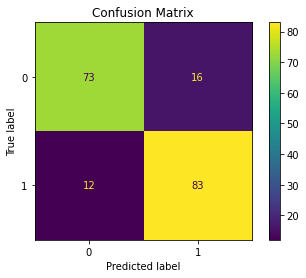

In [22]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)


Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');



print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",            "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["XGBClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">NearestCentroid </strong> 🎲  </h2>

 Accuracy  = 66.85 %
 F1 Score  = 0.61
 Roc Auc Score  = 0.67
 Balanced Accuracy Score  = 0.67
 Precision Score  = 0.77
 Recall Score  = 0.51 

 Confusion Matrix: 

[[75 14]
 [47 48]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.61      0.84      0.71        89
           1       0.77      0.51      0.61        95

    accuracy                           0.67       184
   macro avg       0.69      0.67      0.66       184
weighted avg       0.70      0.67      0.66       184




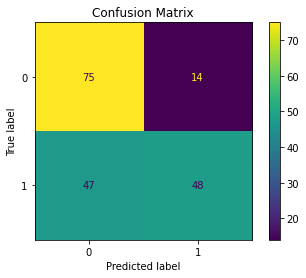

In [23]:
from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
#plot_roc_curve(model, X_test, y_test);
#plt.title('Roc Curve');
#plot_precision_recall_curve(model, X_test, y_test)
#plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",            "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["NearestCentroid", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">SVC</strong> 🎲  </h2>

 Accuracy  = 73.91 %
 F1 Score  = 0.75
 Roc Auc Score  = 0.74
 Balanced Accuracy Score  = 0.74
 Precision Score  = 0.74
 Recall Score  = 0.77 

 Confusion Matrix: 

[[63 26]
 [22 73]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.74      0.71      0.72        89
           1       0.74      0.77      0.75        95

    accuracy                           0.74       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.74      0.74      0.74       184




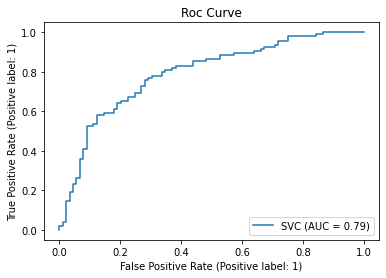

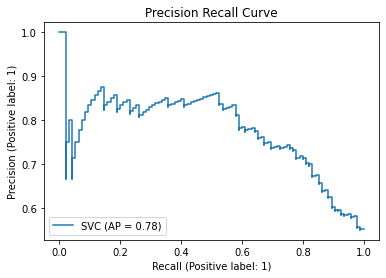

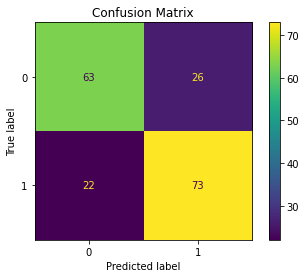

In [24]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["SVC", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">KNeighborsClassifier</strong> 🎲  </h2>

 Accuracy  = 75.0 %
 F1 Score  = 0.77
 Roc Auc Score  = 0.75
 Balanced Accuracy Score  = 0.75
 Precision Score  = 0.73
 Recall Score  = 0.82 

 Confusion Matrix: 

[[60 29]
 [17 78]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.78      0.67      0.72        89
           1       0.73      0.82      0.77        95

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.75      0.75       184




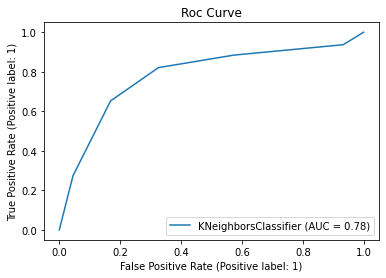

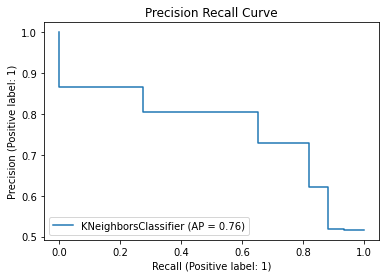

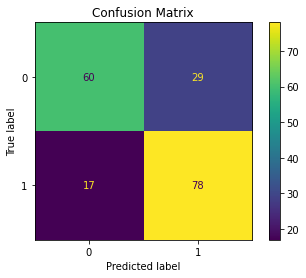

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["KNeighborsClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">GaussianNB</strong> 🎲  </h2>

 Accuracy  = 84.78 %
 F1 Score  = 0.86
 Roc Auc Score  = 0.85
 Balanced Accuracy Score  = 0.85
 Precision Score  = 0.83
 Recall Score  = 0.89 

 Confusion Matrix: 

[[71 18]
 [10 85]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184




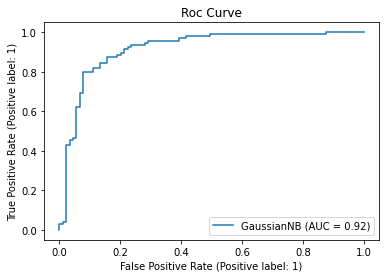

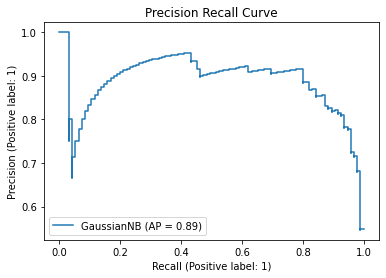

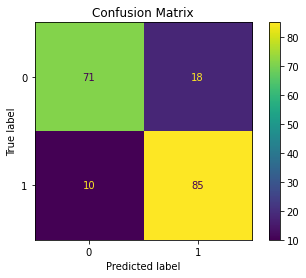

In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["GaussianNB", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">Perceptron</strong> 🎲  </h2>

 Accuracy  = 51.63 %
 F1 Score  = 0.12
 Roc Auc Score  = 0.53
 Balanced Accuracy Score  = 0.53
 Precision Score  = 1.0
 Recall Score  = 0.06 

 Confusion Matrix: 

[[89  0]
 [89  6]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.50      1.00      0.67        89
           1       1.00      0.06      0.12        95

    accuracy                           0.52       184
   macro avg       0.75      0.53      0.39       184
weighted avg       0.76      0.52      0.38       184




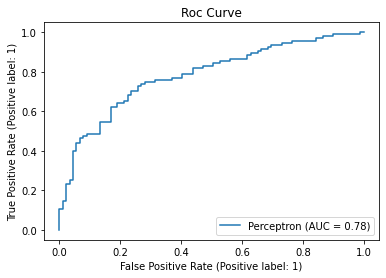

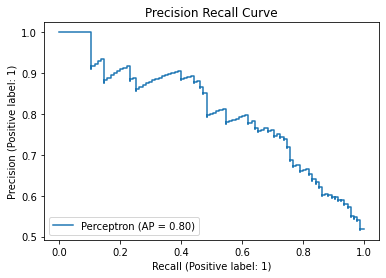

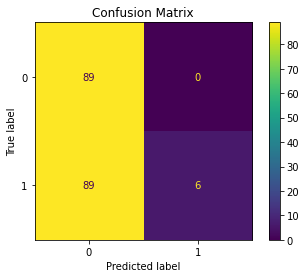

In [27]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["Perceptron", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">SGDClassifier</strong> 🎲  </h2>

 Accuracy  = 61.41 %
 F1 Score  = 0.44
 Roc Auc Score  = 0.62
 Balanced Accuracy Score  = 0.62
 Precision Score  = 0.88
 Recall Score  = 0.29 

 Confusion Matrix: 

[[85  4]
 [67 28]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.56      0.96      0.71        89
           1       0.88      0.29      0.44        95

    accuracy                           0.61       184
   macro avg       0.72      0.62      0.57       184
weighted avg       0.72      0.61      0.57       184




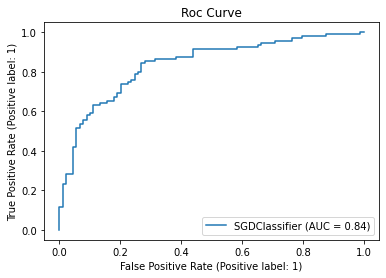

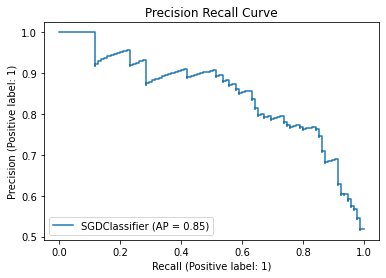

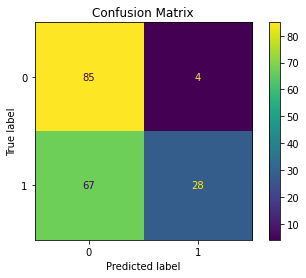

In [28]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["SGDClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">DecisionTreeClassifier</strong> 🎲  </h2>

 Accuracy  = 77.72 %
 F1 Score  = 0.79
 Roc Auc Score  = 0.78
 Balanced Accuracy Score  = 0.78
 Precision Score  = 0.78
 Recall Score  = 0.79 

 Confusion Matrix: 

[[68 21]
 [20 75]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.77      0.76      0.77        89
           1       0.78      0.79      0.79        95

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184




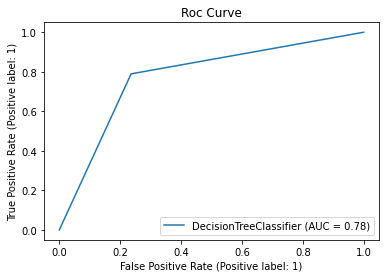

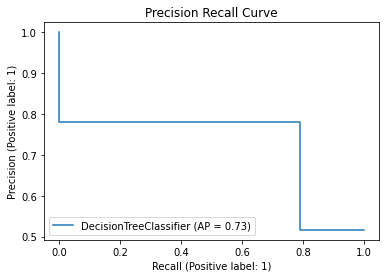

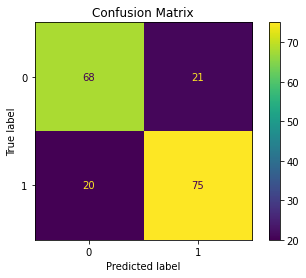

In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["DecisionTreeClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">RandomForestClassifier</strong> 🎲  </h2>

 Accuracy  = 86.96 %
 F1 Score  = 0.88
 Roc Auc Score  = 0.87
 Balanced Accuracy Score  = 0.87
 Precision Score  = 0.85
 Recall Score  = 0.91 

 Confusion Matrix: 

[[74 15]
 [ 9 86]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.89      0.83      0.86        89
           1       0.85      0.91      0.88        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184




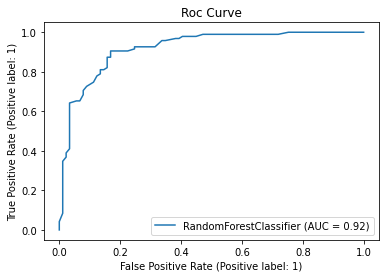

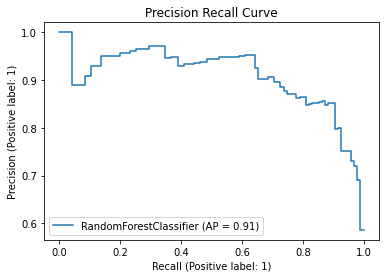

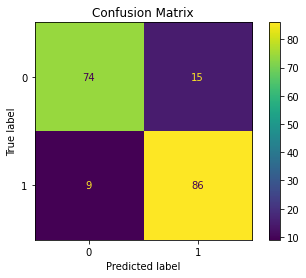

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["RandomForestClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">MLPClassifier</strong> 🎲  </h2>

 Accuracy  = 81.52 %
 F1 Score  = 0.84
 Roc Auc Score  = 0.81
 Balanced Accuracy Score  = 0.81
 Precision Score  = 0.77
 Recall Score  = 0.93 

 Confusion Matrix: 

[[62 27]
 [ 7 88]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.90      0.70      0.78        89
           1       0.77      0.93      0.84        95

    accuracy                           0.82       184
   macro avg       0.83      0.81      0.81       184
weighted avg       0.83      0.82      0.81       184




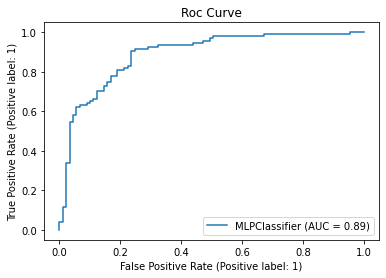

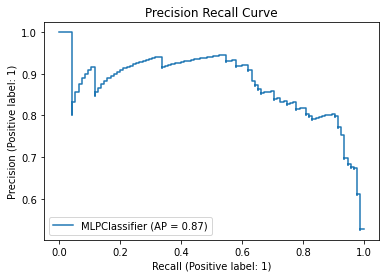

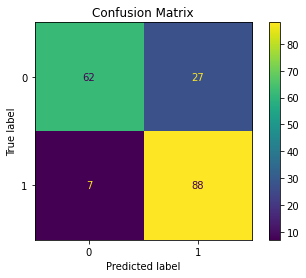

In [31]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["MLPClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">ExtraTreesClassifier</strong> 🎲  </h2>

 Accuracy  = 83.7 %
 F1 Score  = 0.85
 Roc Auc Score  = 0.84
 Balanced Accuracy Score  = 0.84
 Precision Score  = 0.82
 Recall Score  = 0.87 

 Confusion Matrix: 

[[71 18]
 [12 83]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        89
           1       0.82      0.87      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184




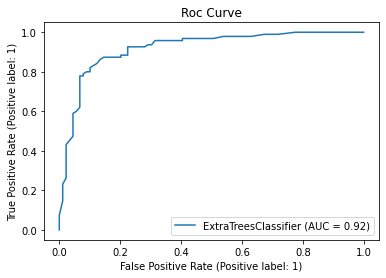

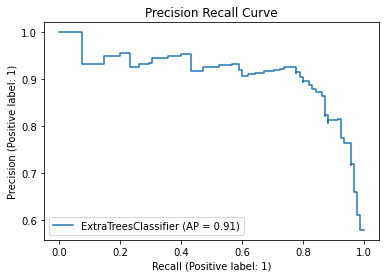

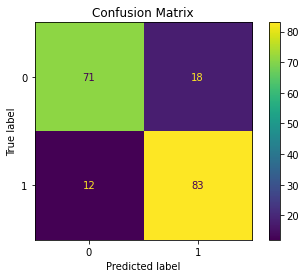

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["ExtraTreesClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">AdaBoostClassifier</strong> 🎲  </h2>

 Accuracy  = 85.87 %
 F1 Score  = 0.86
 Roc Auc Score  = 0.86
 Balanced Accuracy Score  = 0.86
 Precision Score  = 0.86
 Recall Score  = 0.86 

 Confusion Matrix: 

[[76 13]
 [13 82]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        89
           1       0.86      0.86      0.86        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184




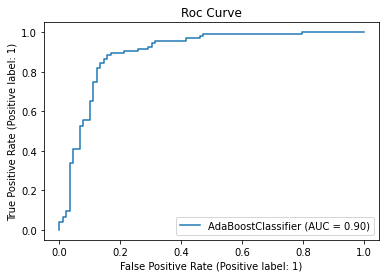

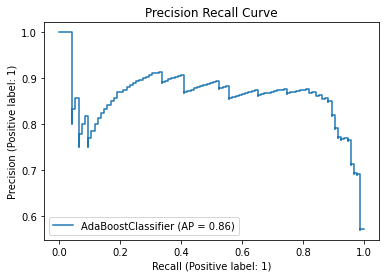

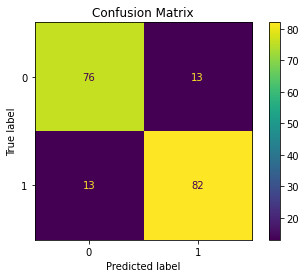

In [33]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["AdaBoostClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">NuSVC </strong> 🎲  </h2>

 Accuracy  = 80.43 %
 F1 Score  = 0.82
 Roc Auc Score  = 0.8
 Balanced Accuracy Score  = 0.8
 Precision Score  = 0.79
 Recall Score  = 0.85 

 Confusion Matrix: 

[[67 22]
 [14 81]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.83      0.75      0.79        89
           1       0.79      0.85      0.82        95

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184




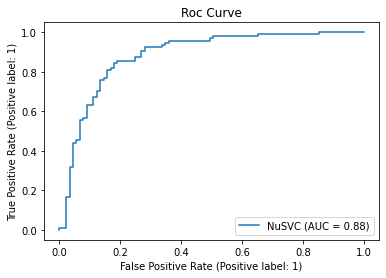

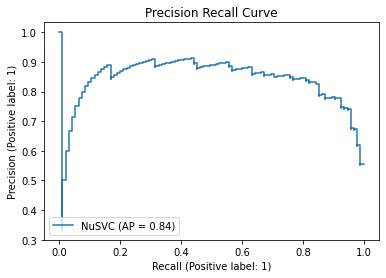

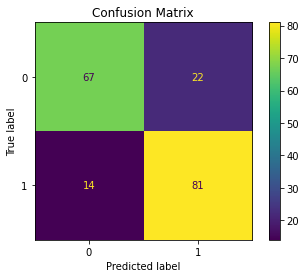

In [34]:
from sklearn.svm import NuSVC

model = NuSVC()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["NuSVC", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">GaussianProcessClassifier</strong> 🎲  </h2>

 Accuracy  = 64.13 %
 F1 Score  = 0.66
 Roc Auc Score  = 0.64
 Balanced Accuracy Score  = 0.64
 Precision Score  = 0.65
 Recall Score  = 0.66 

 Confusion Matrix: 

[[55 34]
 [32 63]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.63      0.62      0.62        89
           1       0.65      0.66      0.66        95

    accuracy                           0.64       184
   macro avg       0.64      0.64      0.64       184
weighted avg       0.64      0.64      0.64       184




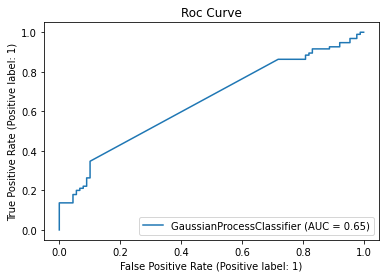

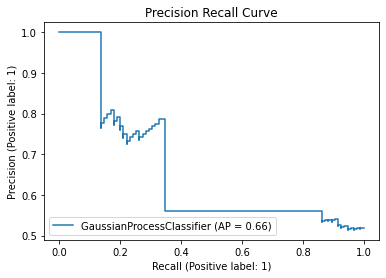

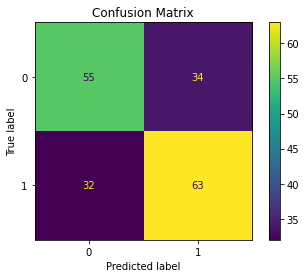

In [35]:
from sklearn.gaussian_process import GaussianProcessClassifier

model = GaussianProcessClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["GaussianProcessClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">HistGradientBoostingClassifier</strong> 🎲  </h2>

 Accuracy  = 86.96 %
 F1 Score  = 0.88
 Roc Auc Score  = 0.87
 Balanced Accuracy Score  = 0.87
 Precision Score  = 0.85
 Recall Score  = 0.91 

 Confusion Matrix: 

[[74 15]
 [ 9 86]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.89      0.83      0.86        89
           1       0.85      0.91      0.88        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184




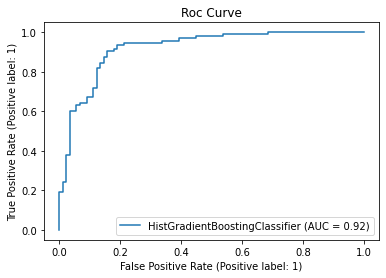

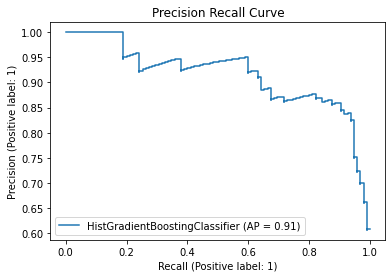

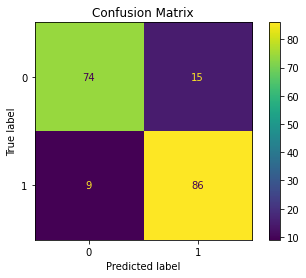

In [36]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["HistGradientBoostingClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">CalibratedClassifierCV</strong> 🎲  </h2>

 Accuracy  = 83.7 %
 F1 Score  = 0.85
 Roc Auc Score  = 0.84
 Balanced Accuracy Score  = 0.84
 Precision Score  = 0.83
 Recall Score  = 0.86 

 Confusion Matrix: 

[[72 17]
 [13 82]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        89
           1       0.83      0.86      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184




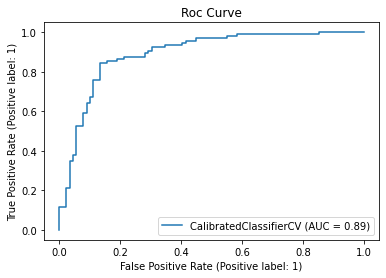

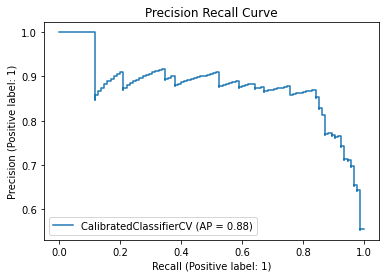

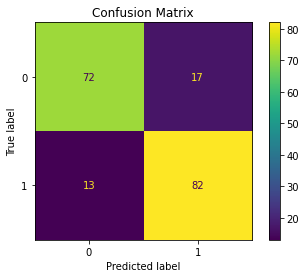

In [37]:
from sklearn.calibration import CalibratedClassifierCV

model =CalibratedClassifierCV()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["CalibratedClassifierCV", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

<h2 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">PassiveAggressiveClassifier</strong> 🎲  </h2>

 Accuracy  = 52.72 %
 F1 Score  = 0.68
 Roc Auc Score  = 0.51
 Balanced Accuracy Score  = 0.51
 Precision Score  = 0.52
 Recall Score  = 0.97 

 Confusion Matrix: 

[[ 5 84]
 [ 3 92]]


 Classification Report:


              precision    recall  f1-score   support

           0       0.62      0.06      0.10        89
           1       0.52      0.97      0.68        95

    accuracy                           0.53       184
   macro avg       0.57      0.51      0.39       184
weighted avg       0.57      0.53      0.40       184




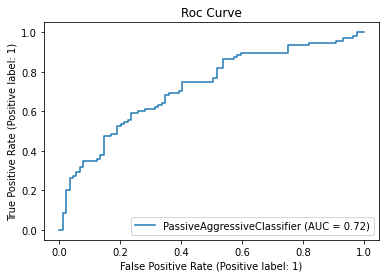

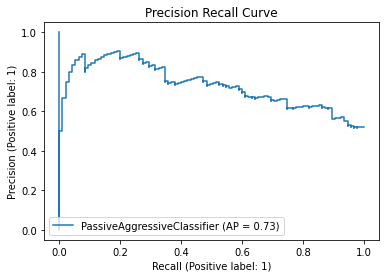

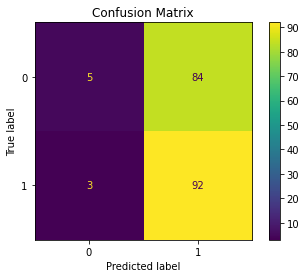

In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Accuracy = round(accuracy_score(predict, y_test) * 100, 2)
F1_Score = f1_score(y_test,predict).round(2)
Roc_Auc_Score = roc_auc_score(y_test,predict).round(2)
Balanced_Accuracy_Score = balanced_accuracy_score(y_test,predict).round(2)
Precision_Score = precision_score(y_test,predict).round(2)
Recall_Score = recall_score(y_test,predict).round(2)
Confusion_Matrix = confusion_matrix(y_test,predict)
Classification_Report = classification_report(y_test,predict)
plot_roc_curve(model, X_test, y_test);
plt.title('Roc Curve');
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision Recall Curve');
plot_confusion_matrix(model, X_test, y_test);
plt.title('Confusion Matrix');


print(f"\033[031m\033[1m","Accuracy ",                "=" , Accuracy,"%")
print(f"\033[031m\033[1m","F1 Score ",                "=" , F1_Score)
print(f"\033[031m\033[1m","Roc Auc Score ",           "=" , Roc_Auc_Score)
print(f"\033[031m\033[1m","Balanced Accuracy Score ", "=" , Balanced_Accuracy_Score)
print(f"\033[031m\033[1m","Precision Score ",         "=" , Precision_Score)
print(f"\033[031m\033[1m","Recall Score ",             "=" , Recall_Score,'\n')
        
print(f"\033[032m\033[1m","Confusion Matrix:",'\n')
print( Confusion_Matrix)
print('\n')
print(f"\033[035m\033[1m","Classification Report:")
print('\n')
print( Classification_Report)
print(f"\033[032m\033[1m")

results_df = pd.DataFrame(data=[["PassiveAggressiveClassifier", *estimate(y_test, predict)]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Recall_Score','Precision_Score','Roc_Auc_Score','Balanced_Accuracy_Score','Confusion_Matrix'])

results = results.append(results_df, ignore_index=True)

In [39]:
results

,Model,Accuracy,F1_Score,Recall_Score,Precision_Score,Roc_Auc_Score,Balanced_Accuracy_Score,Confusion_Matrix
0,LogisticRegression,85.33,0.86,0.87,0.85,0.85,0.85,"[[74, 15], [12, 83]]"
1,LGBMClassifier,86.41,0.87,0.89,0.85,0.86,0.86,"[[74, 15], [10, 85]]"
2,RidgeClassifierCV,88.04,0.89,0.89,0.88,0.88,0.88,"[[77, 12], [10, 85]]"
3,QuadraticDiscriminantAnalysis,84.24,0.86,0.91,0.81,0.84,0.84,"[[69, 20], [9, 86]]"
4,BernoulliNB,80.98,0.82,0.86,0.79,0.81,0.81,"[[67, 22], [13, 82]]"
5,BaggingClassifier,81.52,0.82,0.81,0.83,0.82,0.82,"[[73, 16], [18, 77]]"
6,CalibratedClassifierCV,83.70,0.85,0.86,0.83,0.84,0.84,"[[72, 17], [13, 82]]"
7,XGBClassifier,84.78,0.86,0.87,0.84,0.85,0.85,"[[73, 16], [12, 83]]"
8,NearestCentroid,66.85,0.61,0.51,0.77,0.67,0.67,"[[75, 14], [47, 48]]"
9,SVC,73.91,0.75,0.77,0.74,0.74,0.74,"[[63, 26], [22, 73]]"


In [40]:
results.sort_values(by='Accuracy',ascending=False).style.background_gradient(cmap="tab10").set_properties(**{
            'font-family': 'Comic Sans MS',
            'color': '#bfd3e6',
            'font-size': '15px',"color": "Brown"
        })

,Model,Accuracy,F1_Score,Recall_Score,Precision_Score,Roc_Auc_Score,Balanced_Accuracy_Score,Confusion_Matrix
2,RidgeClassifierCV,88.040000,0.890000,0.890000,0.880000,0.880000,0.880000,[[77 12] [10 85]]
21,HistGradientBoostingClassifier,86.960000,0.880000,0.910000,0.850000,0.870000,0.870000,[[74 15] [ 9 86]]
15,RandomForestClassifier,86.960000,0.880000,0.910000,0.850000,0.870000,0.870000,[[74 15] [ 9 86]]
1,LGBMClassifier,86.410000,0.870000,0.890000,0.850000,0.860000,0.860000,[[74 15] [10 85]]
18,AdaBoostClassifier,85.870000,0.860000,0.860000,0.860000,0.860000,0.860000,[[76 13] [13 82]]
0,LogisticRegression,85.330000,0.860000,0.870000,0.850000,0.850000,0.850000,[[74 15] [12 83]]
7,XGBClassifier,84.780000,0.860000,0.870000,0.840000,0.850000,0.850000,[[73 16] [12 83]]
11,GaussianNB,84.780000,0.860000,0.890000,0.830000,0.850000,0.850000,[[71 18] [10 85]]
3,QuadraticDiscriminantAnalysis,84.240000,0.860000,0.910000,0.810000,0.840000,0.840000,[[69 20] [ 9 86]]
6,CalibratedClassifierCV,83.700000,0.850000,0.860000,0.830000,0.840000,0.840000,[[72 17] [13 82]]


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Viner Hand ITC; font-size:28px; color:#FBFAFC; ">Heart disease prediction code deployed on streamlit cloud</span>

In [41]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))

In [42]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"\033[94m\033[1m",'Accuracy score of the training data : ', training_data_accuracy.round(3))

 Accuracy score of the training data :  0.85


In [43]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print(f"\033[94m\033[1m",'Accuracy score of the test data : ', test_data_accuracy.round(3))

 Accuracy score of the test data :  0.88


In [44]:
input_data = (40,1,1,140,289,0,1,172,1,0.0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)

if (prediction[0] == 0):
  print(f"\033[92m\033[1m",'The person is not diabetic',prediction)
else:
  print(f"\033[91m\033[1m",'The person is diabetic',prediction)

 The person is not diabetic [0]


<span style="background-color:#4e4151;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Saving the trained model
</span>

In [45]:
import pickle

filename = 'heart.sav'
pickle.dump(classifier, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('heart.sav', 'rb'))

In [46]:
input_data = (40,1,1,140,289,0,1,172,3,0.0,3)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

if (prediction[0] == 0):
  print(f"\033[92m\033[1m",'The person has no heart Disease',prediction)
else:
  print(f"\033[91m\033[1m",'The person has heart Disease',prediction)

 The person has heart Disease [1]


[<font color="Red" size=+3 face="Viner Hand ITC">Streamlit App Link</font>](https://afrozpython-heart-disease-heart-8ak93n.streamlit.app/)